# Проект: Исследование объявлений о продаже квартир

## Описание проекта: ##

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [2]:
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:    
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Описание данных:**
<ul>
    <li>total_images — число фотографий квартиры в объявлении</li>
    <li>last_price — цена на момент снятия с публикации</li>
    <li>total_area — общая площадь квартиры в квадратных метрах (м²)</li>
    <li>first_day_exposition — дата публикации</li>
    <li>rooms — число комнат</li>
    <li>ceiling_height — высота потолков (м)</li>
    <li>floors_total — всего этажей в доме</li>
    <li>living_area — жилая площадь в квадратных метрах (м²)</li>
    <li>floor — этаж</li>
    <li>is_apartment — апартаменты (булев тип)</li>
    <li>studio — квартира-студия (булев тип)</li>
    <li>open_plan — свободная планировка (булев тип)</li>
    <li>kitchen_area — площадь кухни в квадратных метрах (м²)</li>
    <li>balcony — число балконов</li>
    <li>locality_name — название населённого пункта</li>
    <li>airports_nearest — расстояние до ближайшего аэропорта в метрах (м)</li>
    <li>cityCenters_nearest — расстояние до центра города (м)</li>
    <li>parks_around3000 — число парков в радиусе 3 км</li>
    <li>parks_nearest — расстояние до ближайшего парка (м)</li>
    <li>ponds_around3000 — число водоёмов в радиусе 3 км</li>
    <li>ponds_nearest — расстояние до ближайшего водоёма (м)</li>
    <li>days_exposition — сколько дней было размещено объявление (от публикации до снятия)</li>
</ul>        

In [5]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21697,11,6650000.0,67.0,2017-08-31T00:00:00,3,NaN,9.0,49.0,4,NaN,...,6.0,0.0,Санкт-Петербург,30211.0,6741.0,0.0,NaN,1.0,650.0,6.0
4714,8,8500000.0,83.0,2017-12-14T00:00:00,4,NaN,9.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,31823.0,8901.0,0.0,NaN,1.0,463.0,60.0
10354,7,5800000.0,63.0,2015-02-09T00:00:00,2,NaN,21.0,29.5,3,NaN,...,15.0,1.0,Санкт-Петербург,17730.0,16527.0,0.0,NaN,2.0,350.0,1065.0
19806,7,7500000.0,78.0,2017-08-07T00:00:00,3,2.81,6.0,49.5,4,NaN,...,8.6,NaN,Санкт-Петербург,25783.0,4358.0,2.0,498.0,0.0,NaN,113.0
17638,10,10487000.0,72.9,2014-12-09T00:00:00,2,2.70,3.0,25.0,2,NaN,...,31.5,0.0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,742.0
19429,20,3950000.0,43.6,2018-08-22T00:00:00,2,2.50,5.0,31.0,1,NaN,...,6.0,NaN,Санкт-Петербург,41064.0,12767.0,2.0,259.0,0.0,NaN,43.0
12295,7,4200000.0,36.0,2019-02-19T00:00:00,1,2.80,12.0,21.0,2,NaN,...,10.0,NaN,Санкт-Петербург,11494.0,12433.0,1.0,254.0,1.0,43.0,NaN
17997,20,6800000.0,83.0,2016-04-10T00:00:00,4,NaN,5.0,64.0,1,NaN,...,7.0,NaN,Санкт-Петербург,13664.0,10744.0,0.0,NaN,1.0,349.0,1016.0
23682,11,2350000.0,35.6,2016-06-23T00:00:00,1,2.50,5.0,17.0,4,False,...,8.3,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,40.0
14322,9,3830000.0,41.0,2015-11-27T00:00:00,1,NaN,12.0,20.1,5,False,...,9.9,2.0,Санкт-Петербург,35490.0,15791.0,0.0,NaN,3.0,915.0,260.0


In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


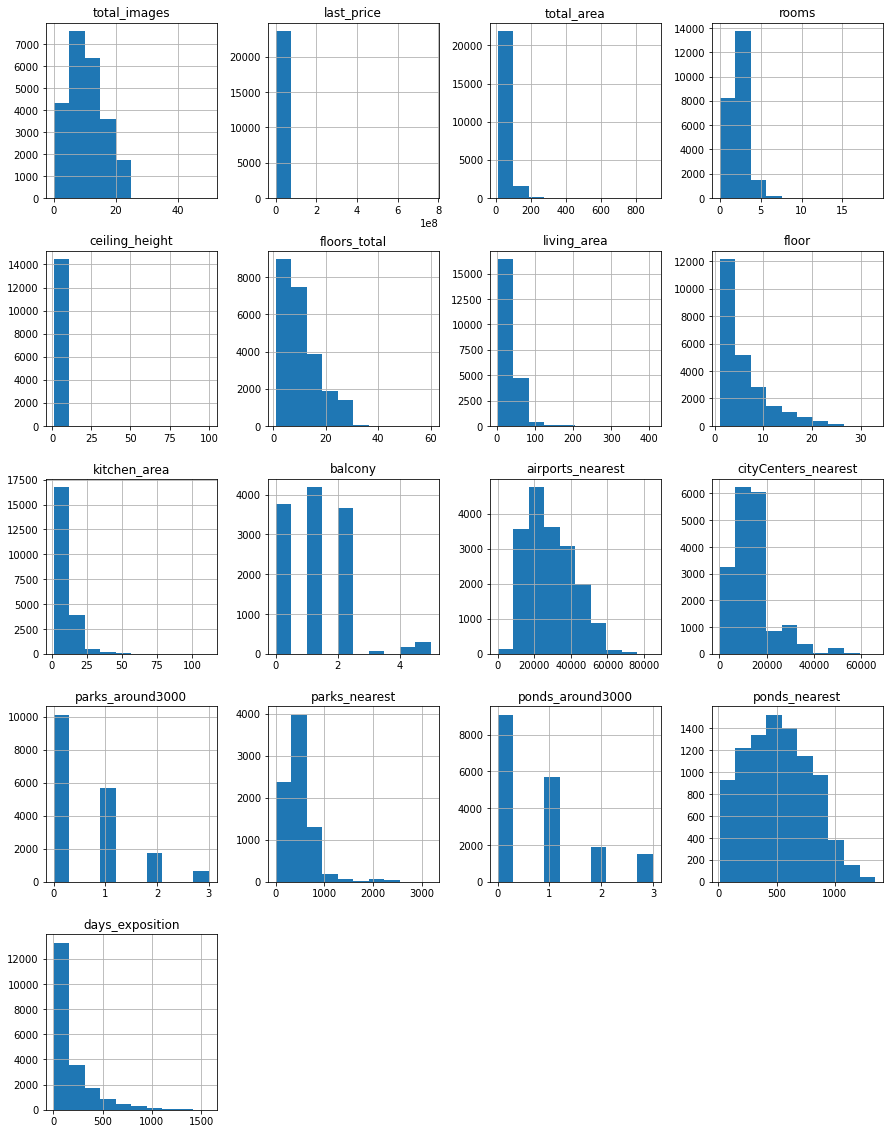

In [7]:
data.hist(figsize=(15, 20));


***Вывод***<br><br>
**1.** Присутствуют пропущенные значения в 14 столбцах.<br>
Столбцы с пропусками: **ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.**

**2.** В названии стобцов **parks_around3000, ponds_around3000, cityCenters_nearest** нарушение стиля.

**3.** Несоотвествие формата стобцов.<br>
Из формата float в формат int:**last_price, floors_total, balcony, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, airports_nearest, cityCenters_nearest, days_exposition.**<br>
Из формата object в формат bool:**is_apartment**<br>
Из формата object в формат datetime:**first_day_exposition**

### Предобработка данных

In [8]:
data.columns.tolist() 

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [9]:
data = data.rename(
    columns={'cityCenters_nearest':'city_centers_nearest',
             'parks_around3000':'parks_around_3000',
             'ponds_around3000':'ponds_around_3000'}
)

data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'city_centers_nearest',
 'parks_around_3000',
 'parks_nearest',
 'ponds_around_3000',
 'ponds_nearest',
 'days_exposition']

In [10]:
data.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around_3000        5518
parks_around_3000        5518
city_centers_nearest     5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

In [11]:
# обработаем параметр 'locality_name'
data['locality_name'].unique().tolist() 

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

In [12]:
len(data['locality_name'].unique())

365

In [13]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

In [14]:
len(data['locality_name'].unique())

331

In [15]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа ', 'поселок ', regex=True)

In [16]:
data['locality_name'].unique().tolist() 

['Санкт-Петербург',
 'поселок Шушары',
 'городской поселок Янино-1',
 'поселок Парголово',
 'поселок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок Красный Бор',
 'Гатчина',
 'деревня Федоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'поселок Металлострой',
 'поселок Лебяжье',
 'поселок Сиверский',
 'поселок Молодцово',
 'поселок Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'поселок Аннино',
 'поселок Ефимовский',
 'поселок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'поселок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'поселок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 'Мурино',
 'Шлиссельбург',
 'Никольское',
 'Зеленогорск',
 'Сосновый Бор',
 'деревня Оржицы',
 'дере

In [17]:
data['locality_name'] = data['locality_name'].where(~data['locality_name'].isna(),'unknown')
data['locality_name'].isna().sum()

0

In [18]:
# обработаем параметр 'floors_total'
data['floors_total'].isna().sum() 

86

In [19]:
data = data.dropna(subset=['floors_total'])
data['floors_total'].isna().sum()

0

In [20]:
data['living_area'].describe() 

count    21743.000000
mean        34.462781
std         22.037433
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [21]:
def cat_area(area):
    if area <= 40:
        return 'средняя'
    elif 40 < area <=69 :
        return 'большая'
    else:
        return 'огромная'

In [22]:
def type_of_flat(rooms):
    if rooms <= 1:
        return 'средняя'
    elif 1 < rooms <= 3 :
        return 'большая'
    else:
        return 'огромная'

In [23]:
data['type_of_area'] = data['total_area'].apply(cat_area)
data['type_of_flat'] = data['rooms'].apply(type_of_flat)

In [24]:
living_pivot_table = data.pivot_table(index = ['type_of_flat', 'type_of_area'],
                                       columns = 'studio',
                                       values = 'living_area', aggfunc = 'median' ).dropna(axis = 0)

In [25]:
# cоздадим общую функцию, с помощью которой будем заполнять пропуски
def columns_fillna(row, pivot_table,aim_column, index_columns): 
    if pd.isnull(row[aim_column]):
        index = (index_columns[0],index_columns[1])
        if index in pivot_table.index:
            return pivot_table.loc[index][0]
        else:
            return data[aim_column].median()
    else:
        return row[aim_column]

In [26]:
# обработаем параметр 'living_area'
data['living_area']= data.apply(columns_fillna,
                                  pivot_table = living_pivot_table,
                                  aim_column = 'living_area',
                                  index_columns = ['type_of_flat', 'type_of_area'],
                                  axis = 1)
data['living_area'].isna().sum()

0

In [27]:
kitchen_pivot_table = data.pivot_table(index = ['type_of_flat', 'type_of_area'],
                                       columns = 'studio',
                                       values = 'kitchen_area', aggfunc = 'median' ).dropna(axis = 0)

In [28]:
# обработаем параметр 'kitchen_area'
data['kitchen_area']= data.apply(columns_fillna,
                                  pivot_table = kitchen_pivot_table,
                                  aim_column = 'kitchen_area',
                                  index_columns = ['type_of_flat', 'type_of_area'],
                                  axis = 1)
data['kitchen_area'].isna().sum()

0

In [29]:
def type_of_distance(distance):
    if distance <= 10912:
        return 'близко'
    elif 10912 < distance <= 15247:
        return 'средняя дистанция'
    else:
        return 'далеко'

In [30]:
data['type_of_centers_distance'] = data['city_centers_nearest'].apply(type_of_distance)

In [31]:
# обработаем параметр 'ponds_around_3000'
ponds_around_3000_pivot_table = data.pivot_table(index = ['locality_name', 'type_of_centers_distance'],
                                                 values = 'ponds_around_3000' ,aggfunc = 'median')

In [32]:
data['ponds_around_3000'] = data.apply(columns_fillna,
                                        axis = 1,
                                        pivot_table = ponds_around_3000_pivot_table,
                                        aim_column = 'ponds_around_3000',
                                        index_columns = ['locality_name', 'type_of_centers_distance'])
data['ponds_around_3000'].isna().sum()

0

In [33]:
# обработаем параметр 'parks_around_3000'
parks_around_3000_pivot_table = data.pivot_table(index = ['locality_name', 'type_of_centers_distance'],
                                                 values = 'parks_around_3000' ,aggfunc = 'median')

In [34]:
data['parks_around_3000'] = data.apply(columns_fillna,
                                        axis = 1,
                                        pivot_table = parks_around_3000_pivot_table,
                                        aim_column = 'parks_around_3000',
                                        index_columns = ['locality_name', 'type_of_centers_distance'])
data['parks_around_3000'].isna().sum()

0

In [35]:
# обработаем параметр 'city_centers_nearest'
city_centers_nearest_pivot_table = data.pivot_table(index = 'locality_name',values = 'city_centers_nearest')

In [36]:
data['city_centers_nearest'] = data.apply(columns_fillna,
                                        pivot_table = city_centers_nearest_pivot_table,
                                        aim_column = 'city_centers_nearest',
                                        index_columns = 'locality_name',
                                        axis = 1)
data['city_centers_nearest'].isna().sum()

0

In [37]:
# обработаем параметр 'airports_nearest'
airports_nearest_pivot_table = data.pivot_table(
    index = ['locality_name', 'type_of_centers_distance'],
    values = 'airports_nearest',
    aggfunc = 'median'
)

In [38]:
data['airports_nearest'] = data.apply(columns_fillna,
                                        pivot_table = airports_nearest_pivot_table,
                                        aim_column = 'airports_nearest',
                                        index_columns = ['locality_name', 'type_of_centers_distance'],
                                        axis = 1)
data['airports_nearest'].isna().sum()

0

In [39]:
# обработаем параметр 'ceiling_height'
data.loc[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 32), 'ceiling_height'] = data['ceiling_height'] * 0.1

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

data['ceiling_height'].describe()

count    23613.000000
mean         2.705199
std          0.715285
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [40]:
# обработаем параметр 'balcony'
data['balcony'].fillna(0,inplace = True)
data['balcony'].isna().sum()

0

In [41]:
# заполним количество ближайших парков и прудов путем округления значения в ближайших парках и прудах в 3 км
data['parks_nearest'] = data['parks_around_3000'].apply(lambda x: round(x))
data['ponds_nearest'] = data['ponds_around_3000'].apply(lambda x: round(x))

In [42]:
# обработаем параметр 'is_apatment'
data['is_apartment'] = data['is_apartment'].where(~data['is_apartment'].isnull(), False)
data['is_apartment'].isna().sum()

0

In [43]:
data.dropna(subset=['days_exposition'], axis = 0, inplace = True)

In [44]:
# исправим типы данных
data_format_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'city_centers_nearest', 'parks_around_3000', 'parks_nearest', 'ponds_around_3000', 'ponds_nearest', 'days_exposition']

data[data_format_int] = data[data_format_int].astype('int')

data['is_apartment'] = data['is_apartment'].astype('bool')


In [45]:
# обработаем параметр 'first_day_exposition'
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format = '%Y-%m-%dT%H:%M:%S')

In [46]:
data.duplicated().sum()

0

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20441 entries, 1 to 23697
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              20441 non-null  int64         
 1   last_price                20441 non-null  int64         
 2   total_area                20441 non-null  float64       
 3   first_day_exposition      20441 non-null  datetime64[ns]
 4   rooms                     20441 non-null  int64         
 5   ceiling_height            20441 non-null  float64       
 6   floors_total              20441 non-null  int64         
 7   living_area               20441 non-null  float64       
 8   floor                     20441 non-null  int64         
 9   is_apartment              20441 non-null  bool          
 10  studio                    20441 non-null  bool          
 11  open_plan                 20441 non-null  bool          
 12  kitchen_area      

In [48]:
# cоздадим функцию, с помощью которой будем удалять выбросы
def removing_blowouts(column,data):
    q5=np.array(data[column].describe(percentiles=[0.05, 0.95]).loc['5%'])
    q95=np.array(data[column].describe(percentiles=[0.05, 0.95]).loc['95%'])
    first_part=q5-1.5*(q95-q5)
    second_part=q95+1.5*(q95-q5)
    leng = 1
    while leng > 0:
        index_del= []
        for index, element in enumerate(data[column]):
            if first_part > element or second_part< element:
                index_del.extend(data[data[column] == element].index)
        index_del= set(index_del)
        leng = len(index_del)
        print(leng)
        data.drop(index_del,axis=0,inplace=True)

In [49]:
removing_blowouts('ceiling_height', data)

49
0


In [50]:
removing_blowouts('total_area', data)

117
0


In [51]:
removing_blowouts('last_price', data)

151
0


In [52]:
removing_blowouts('rooms', data)

1
0


***Вывод***<br><br>Обнаружено не большое количество выбросов. Все проблемные места исправлены. Дубликаты не обнаружены.

### Посчитайте и добавьте в таблицу новые столбцы

In [53]:
# добавляем параметр price_sq_meter с расчетом 1 кв м
data['price_sq_meter'] = data.apply(lambda row: row['last_price'] / row['total_area'], axis = 1)

In [54]:
# добавление параметра с днем недели публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [55]:
# добавление параметра с месяцем публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month

In [56]:
# добавление параметра с годом публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year

In [57]:
# функция, определяющая категорию этажа:
def floors_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'


data['floor_group'] = data.apply(floors_category, axis=1)  

In [58]:
# добавим расстояние до центра города в километрах
data['city_center_distance_km'] = np.round(data.apply(lambda row: row['city_centers_nearest'] / 1000, axis = 1))

In [59]:
data['city_center_distance_km']

1        19.0
2        14.0
4         8.0
5        13.0
6        19.0
         ... 
23691     4.0
23692    13.0
23693    34.0
23695    13.0
23697    10.0
Name: city_center_distance_km, Length: 20123, dtype: float64

***Вывод***<br><br> Добавлены столбцы со значениями: <br><br>**1.** Цена за 1 кв.м. (price_sq_meter)<br> **2.** День объявления (weekday_exposition)<br> **3.** Месяц объявления (month_exposition)<br> **4.** Год объявления (year_exposition)<br> **5.** Категория этажа (floor_group)<br> **6.** Расстояние до центра города в километрах

### Проведите исследовательский анализ данных

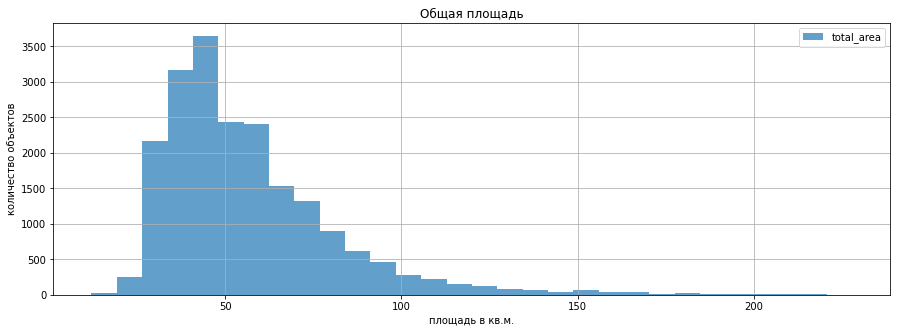

In [60]:
data['total_area'].hist(bins = 30, legend=True, alpha=0.7, figsize = (15,5)).set(title='Общая площадь', 
    xlabel='площадь в кв.м.', ylabel='количество объектов');

In [61]:
data['total_area'].describe()

count    20123.000000
mean        56.511979
std         25.016566
min         12.000000
25%         39.300000
50%         50.100000
75%         66.875000
max        228.000000
Name: total_area, dtype: float64

<span style="color:blue"><b>Основная часть квартир приблизительно находится в диапазоне от 30 кв. м до 66 кв.м общей площади.</b></span>

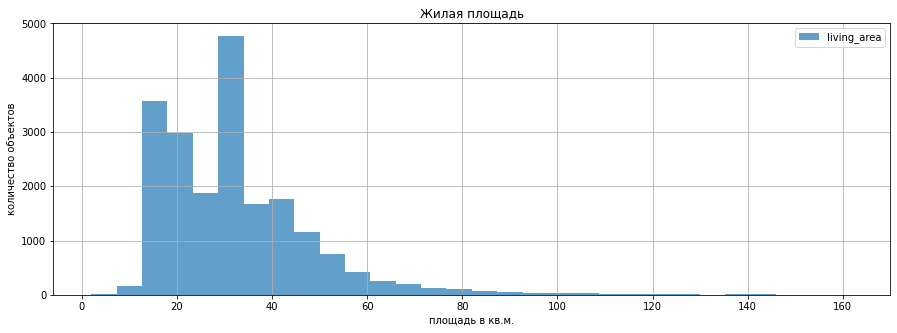

In [62]:
data['living_area'].hist(bins = 30, legend=True, alpha=0.7, figsize = (15,5)).set(title='Жилая площадь', 
    xlabel='площадь в кв.м.', ylabel='количество объектов');

In [63]:
data['living_area'].describe()

count    20123.000000
mean        32.077956
std         16.047090
min          2.000000
25%         18.800000
50%         30.000000
75%         39.600000
max        162.000000
Name: living_area, dtype: float64

<span style="color:blue"><b>Основной диапазон жилой площади приблизительно находится от 18 кв.м до 39 кв.м с пиком 18 и 30 кв.м.</b></span>

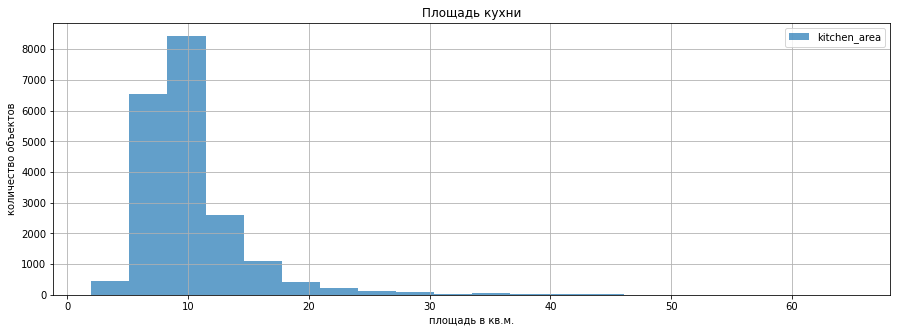

In [64]:
data['kitchen_area'].hist(bins=20, legend=True,alpha=0.7, figsize = (15,5)).set(title='Площадь кухни', 
    xlabel='площадь в кв.м.', ylabel='количество объектов');

In [65]:
data['kitchen_area'].describe()

count    20123.000000
mean        10.061872
std          4.572305
min          2.000000
25%          7.200000
50%          9.100000
75%         11.000000
max         65.000000
Name: kitchen_area, dtype: float64

<span style="color:blue"><b>Диапазон площади кухни-в основном от 5 до 11 кв.м., с пиком 9 - 10 кв.м.</b></span>

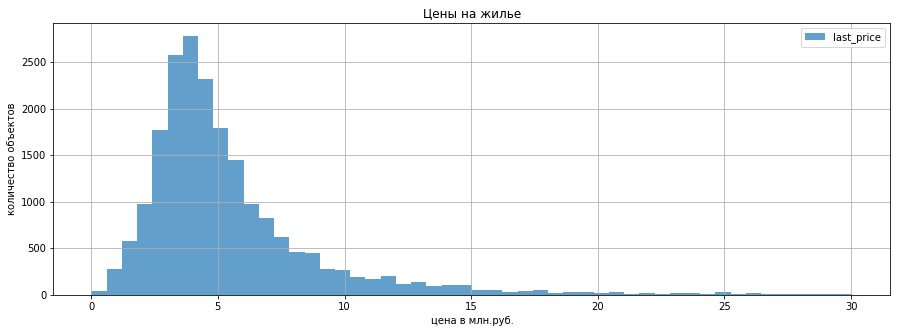

In [66]:
(data['last_price']/1000000).hist(bins=50, legend=True, alpha=0.7, figsize = (15,5)).set(title='Цены на жилье', 
    xlabel='цена в млн.руб.', ylabel='количество объектов');

In [67]:
data['last_price'].describe()

count    2.012300e+04
mean     5.488144e+06
std      3.682506e+06
min      1.219000e+04
25%      3.391166e+06
50%      4.500000e+06
75%      6.382500e+06
max      3.005000e+07
Name: last_price, dtype: float64

<span style="color:blue"><b>Цены на квартиры в основном находятся в диапазоне 2-6 млн.руб. с пиком в области 3-4 млн.руб.</b></span>

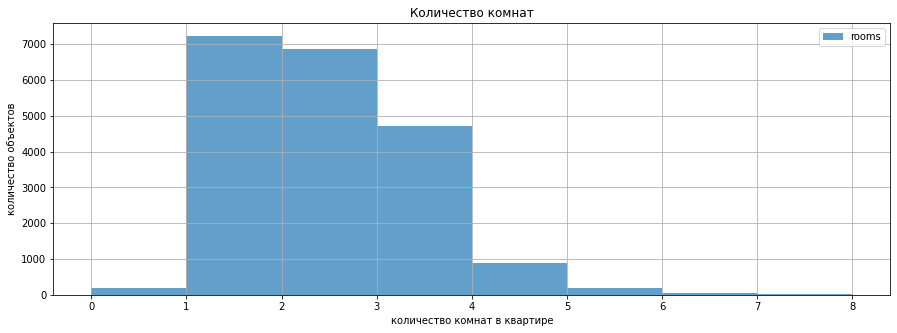

In [68]:
data['rooms'].hist(bins = data['rooms'].max(), legend=True,alpha=0.7, figsize = (15,5)).set(title='Количество комнат', 
    xlabel='количество комнат в квартире', ylabel='количество объектов');

In [69]:
data['rooms'].describe()

count    20123.000000
mean         1.987676
std          0.976336
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

<span style="color:blue"><b>Большая часть квартир являются 1-3 комнатными. Нулевой показатель - квартиры студии.</b></span>

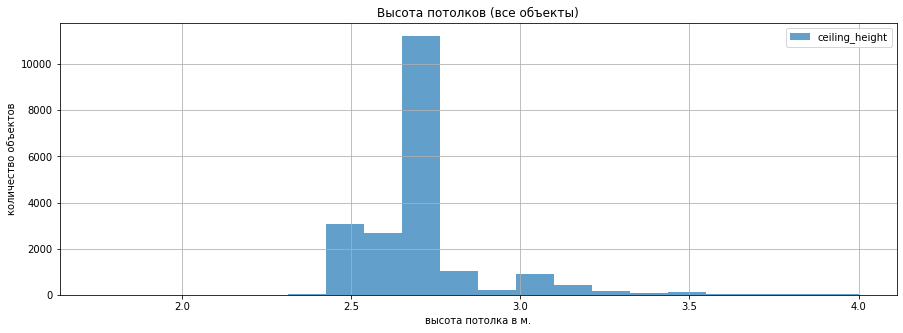

In [70]:
data['ceiling_height'].hist(bins=20, legend=True,alpha=0.7, figsize = (15,5)).set(title='Высота потолков (все объекты)', 
    xlabel='высота потолка в м.', ylabel='количество объектов');

In [71]:
data['ceiling_height'].describe()

count    20123.000000
mean         2.683651
std          0.187897
min          1.750000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

<span style="color:blue"><b>Высота потолка в основном принимает значения от 2.5 до 2.7 м с пиком в высоте 2.65 м.</b></span>

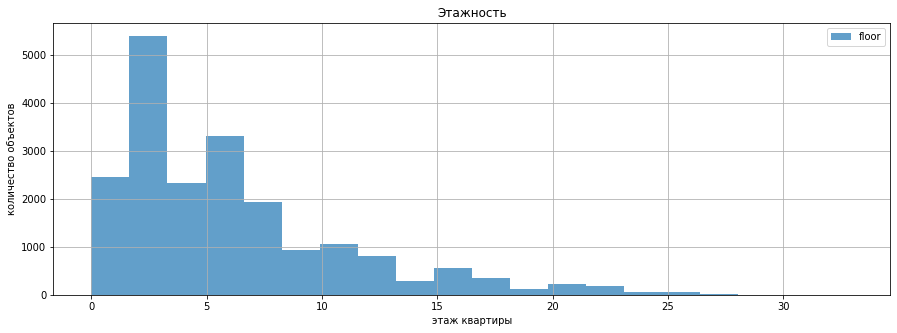

In [72]:
data['floor'].hist(bins=20, legend=True,alpha=0.7, range=(0, 33), figsize = (15,5)).set(title='Этажность', 
    xlabel='этаж квартиры', ylabel='количество объектов');

In [73]:
data['floor'].describe()

count    20123.000000
mean         5.986583
std          4.949031
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<span style="color:blue"><b>Большая часть квартир находится с 1 по 8 этаж. Наблюдаются пики на 2 и 6.</b></span>

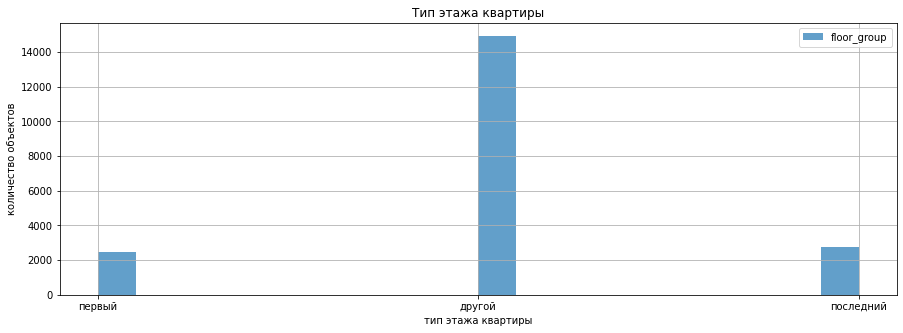

In [74]:
data['floor_group'].hist(bins=20, legend=True,alpha=0.7,figsize = (15,5)).set(title='Тип этажа квартиры', 
    xlabel='тип этажа квартиры', ylabel='количество объектов');

In [75]:
data['floor_group'].describe()

count      20123
unique         3
top       другой
freq       14926
Name: floor_group, dtype: object

<span style="color:blue"><b>Меньше всего покупают квартиры на первом и последнем этаже.</b></span>

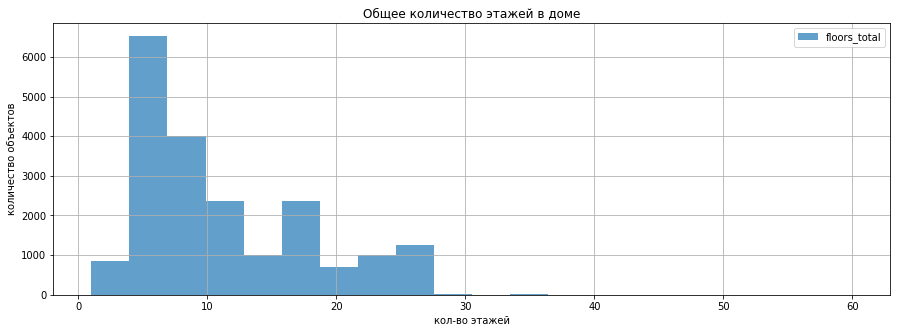

In [76]:
data['floors_total'].hist(bins=20, legend=True,alpha=0.7, figsize = (15,5)).set(title='Общее количество этажей в доме', 
    xlabel='кол-во этажей', ylabel='количество объектов');

In [77]:
data['floors_total'].describe()

count    20123.000000
mean        10.913731
std          6.671261
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<span style="color:blue"><b>Большая часть зданий 5 - 16 этажные. Наблюдаются пики на 5, 10 и 16 этажных домах.</b></span>

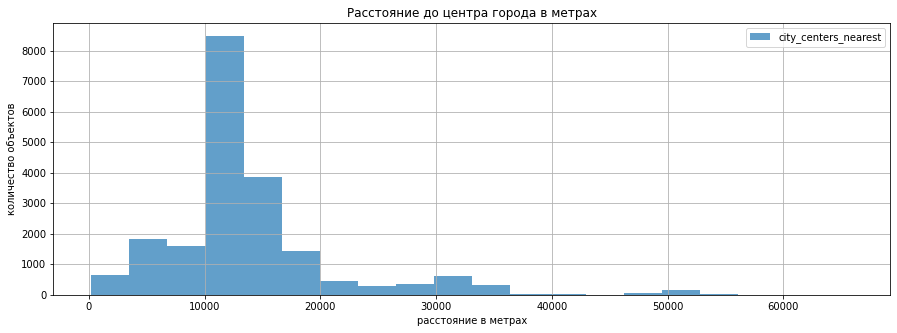

In [78]:
data['city_centers_nearest'].hist(bins=20, legend=True,alpha=0.7, figsize = (15,5)).set(title='Расстояние до центра города в метрах', 
    xlabel='расстояние в метрах', ylabel='количество объектов');

In [79]:
data['city_centers_nearest'].describe()

count    20123.000000
mean     14134.271182
std       7516.956267
min        208.000000
25%      11184.000000
50%      13093.000000
75%      15420.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<span style="color:blue"><b>Основная часть недвижимости расположена от 10 до 16 км удаленности от центра.</b></span>

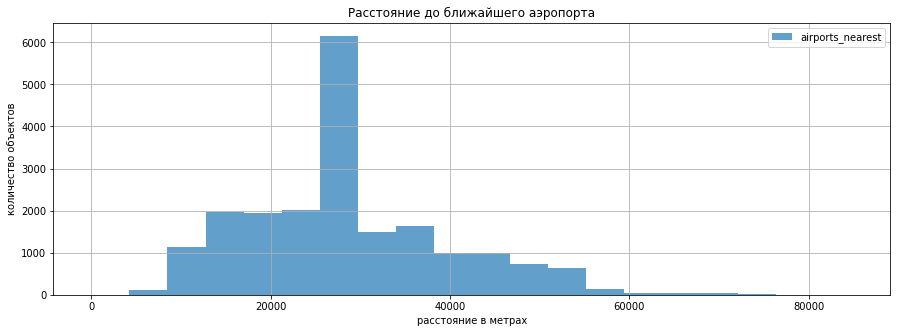

In [80]:
data['airports_nearest'].hist(bins=20,legend=True,alpha=0.7, figsize = (15,5)).set(title='Расстояние до ближайшего аэропорта', 
    xlabel='расстояние в метрах', ylabel='количество объектов');

In [81]:
data['airports_nearest'].describe()

count    20123.000000
mean     28374.865030
std      11254.278876
min          0.000000
25%      20866.500000
50%      26726.000000
75%      34794.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<span style="color:blue"><b>Расстояние до ближайшего аэропорта в большинстве случаев приблизительно от 10 до 35 км. Наблюдается пик в районе 25-26 км. </b></span>

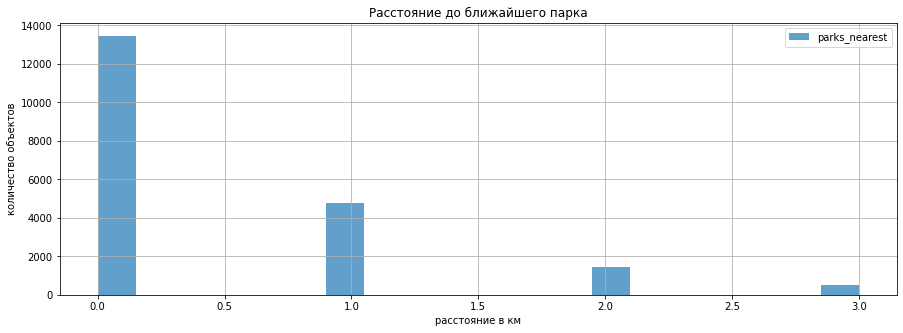

In [82]:
data['parks_nearest'].hist(bins=20, legend=True,alpha=0.7, figsize = (15,5)).set(title='Расстояние до ближайшего парка', 
    xlabel='расстояние в км', ylabel='количество объектов');

In [83]:
data['parks_nearest'].describe()

count    20123.000000
mean         0.451175
std          0.731216
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_nearest, dtype: float64

<span style="color:blue"><b>В основном все дома расположены близ парка, лишь незначительная часть находится в удаленности более 1 км. </b></span>

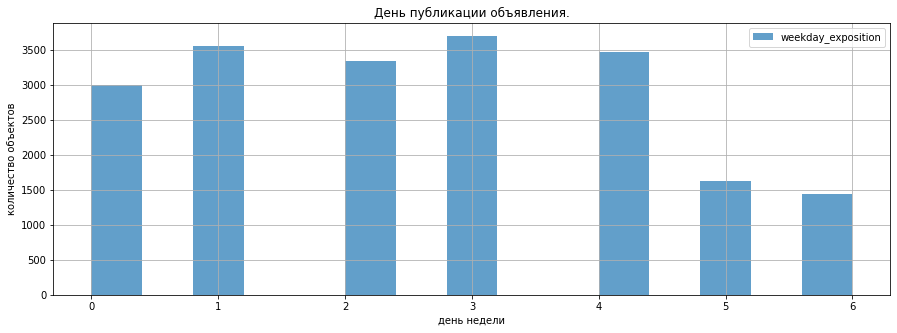

In [84]:
data['weekday_exposition'].hist(bins = 15, legend=True,alpha=0.7,figsize = (15,5)).set(title='День публикации объявления.', 
    xlabel='день недели', ylabel='количество объектов');

In [85]:
data['weekday_exposition'].describe()

count    20123.000000
mean         2.582418
std          1.783257
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64

<span style="color:blue"><b>В будние дни кол-во публикаций примерно на одном уровне (3000 - 3500). В выходные дни наблюдается спад до 1500 публикаций.</b></span>

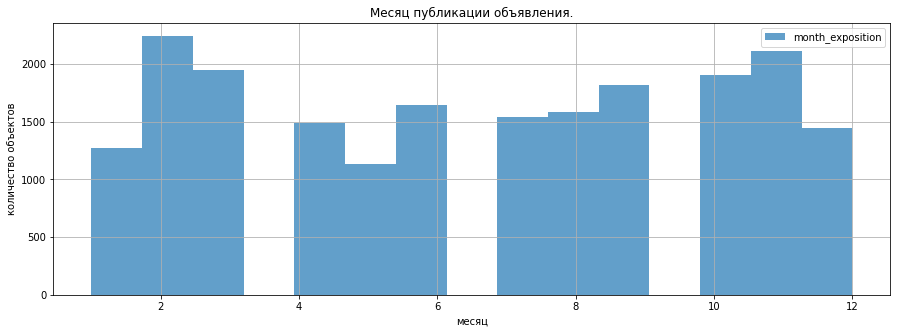

In [86]:
data['month_exposition'].hist(bins = 15, legend=True,alpha=0.7,figsize = (15,5)).set(title='Месяц публикации объявления.', 
    xlabel='месяц', ylabel='количество объектов');

In [87]:
data['month_exposition'].describe()

count    20123.000000
mean         6.582965
std          3.488449
min          1.000000
25%          3.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

<span style="color:blue"><b>Рост количества публикаций наблюдается осень и зимой, весной и летом происходит спад из за понижения спроса.</b></span>

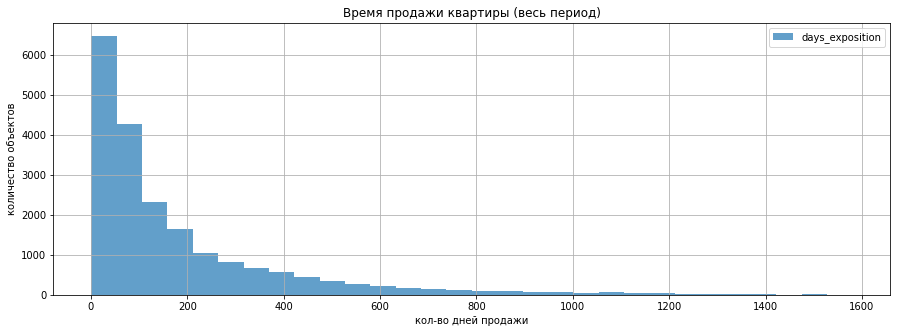

In [88]:
data['days_exposition'].hist(bins=30, legend=True,alpha=0.7, figsize = (15,5)).set(title='Время продажи квартиры (весь период)', 
    xlabel='кол-во дней продажи', ylabel='количество объектов');

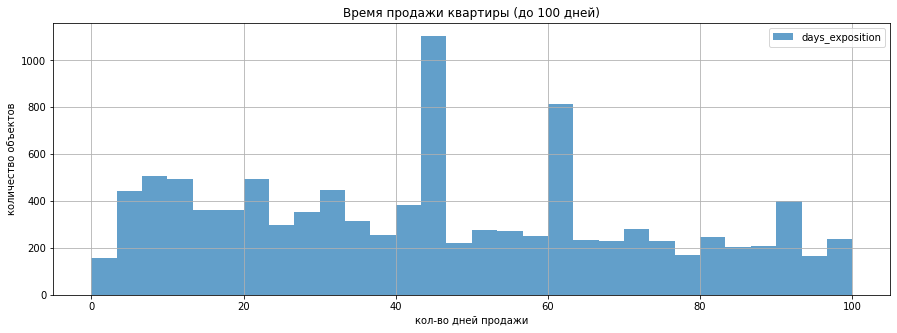

In [89]:
data['days_exposition'].hist(bins=30, legend=True,alpha=0.7, range=(0, 100), figsize = (15,5)).set(title='Время продажи квартиры (до 100 дней)', 
    xlabel='кол-во дней продажи', ylabel='количество объектов');

In [90]:
data['days_exposition'].describe()

count    20123.000000
mean       179.103911
std        217.584145
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

<span style="color:blue"><b>Большая часть квартир продается в течении 229 дней. Так же наблюдаются пики в районе 42-45 и 60-62 дней</b></span>

***Вывод***<br><br>
В среднем квартиры продаются по цене 5.4 млн рублей, с общей площадью 56 кв. м. и жилой площадью 32 кв.м, где кухня составляет 10 кв. м. Пользуются спросом 1 - 3 комнатные квартиры с высотой полков 2.68 м на 6 - ом этаже в домах этажностью от 10 этажей и выше, с удаленностью от центра 14 км, от аэропорта 28 км, ближайший парк находится в непосредственной близости к дому. В будние дни количество публикаций сохраняется приблизительно на одном уровне, в выходные дни наблюдается спад. Основное количество объявлений наблюдается в осенний и зимние периоды, весной и летом спрос падает приблизительно на 20-30%. Большая часть недвижимости продается в первые 229 дней.

**Влияние различных факторов на общую(полную) стоимость объекта.**

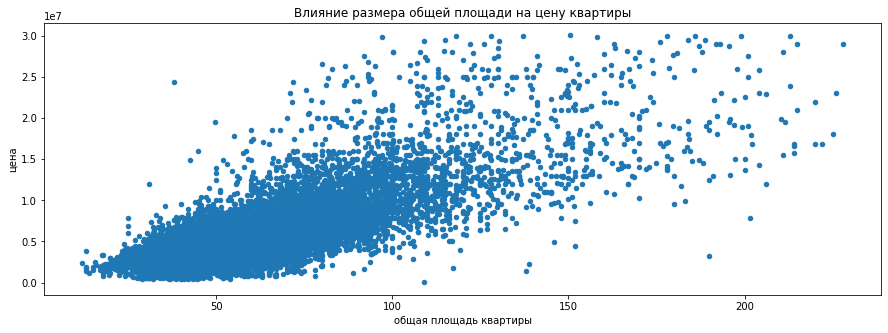

In [91]:
data.plot(x='total_area', y='last_price', kind='scatter', figsize=(15,5)).set(title='Влияние размера общей площади на цену квартиры', 
xlabel='общая площадь квартиры', ylabel='цена');


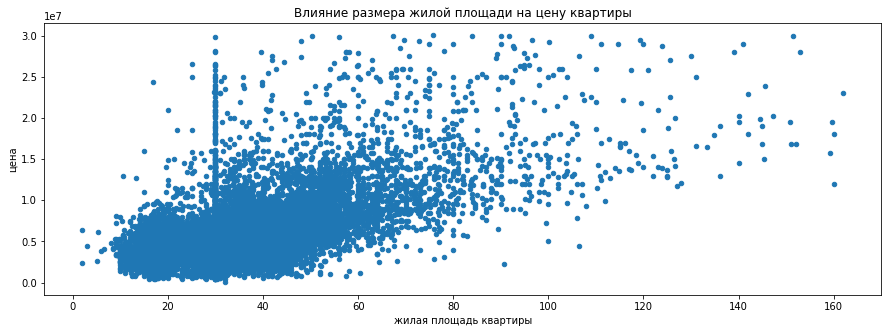

In [92]:
data.plot(x='living_area', y='last_price', kind='scatter', figsize=(15,5)).set(title='Влияние размера жилой площади на цену квартиры', 
xlabel='жилая площадь квартиры', ylabel='цена');

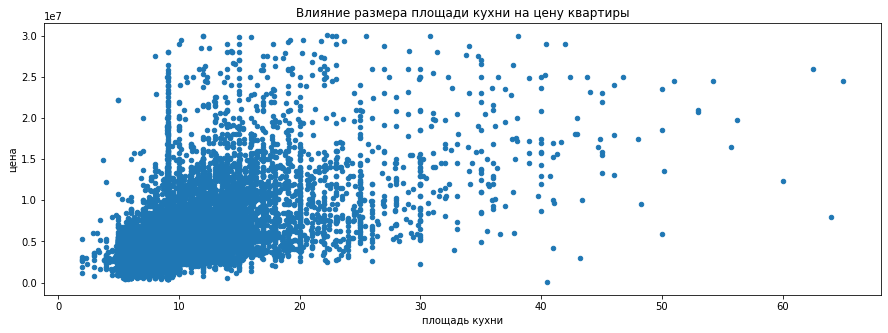

In [93]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(15,5)).set(title='Влияние размера площади кухни на цену квартиры', 
xlabel='площадь кухни', ylabel='цена');

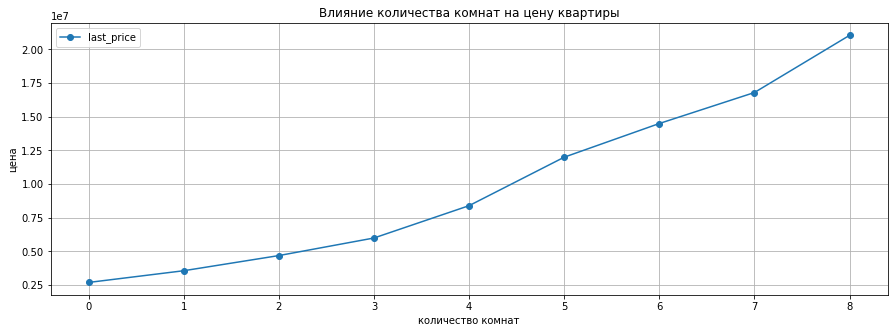

In [94]:
data.pivot_table(index='rooms', values='last_price', aggfunc='median').reset_index().plot(x='rooms', y='last_price', grid=True, figsize=(15,5), style='o-').set(title='Влияние количества комнат на цену квартиры', xlabel='количество комнат', ylabel='цена');

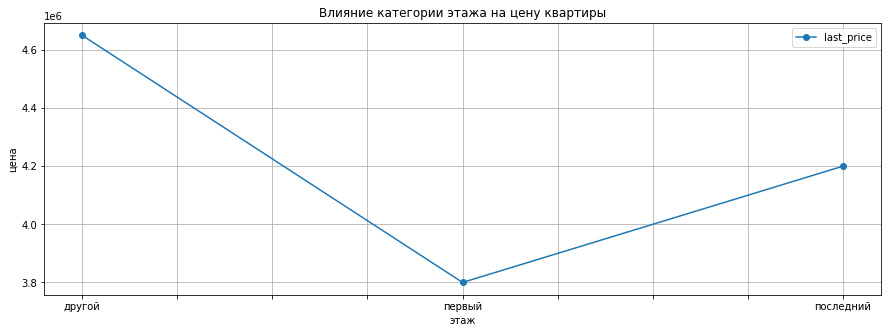

In [95]:
data.pivot_table(index='floor_group', values='last_price', aggfunc='median').reset_index().plot(x='floor_group', y='last_price', grid=True, figsize=(15,5), style='o-').set(title='Влияние категории этажа на цену квартиры', xlabel='этаж', ylabel='цена');

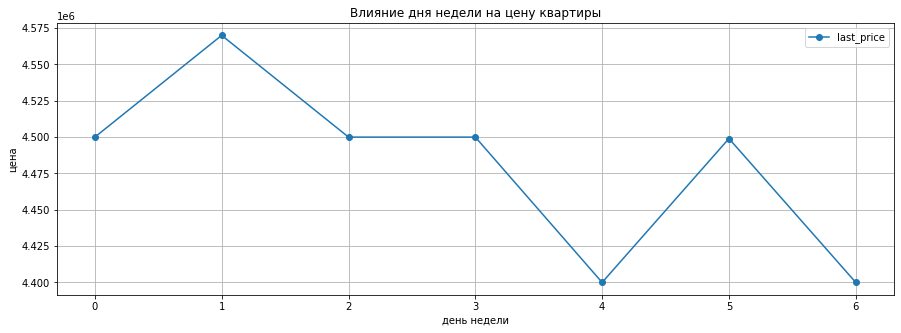

In [96]:
data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median').reset_index().plot(x='weekday_exposition', y='last_price', grid=True, figsize=(15,5), style='o-').set(title='Влияние дня недели на цену квартиры', xlabel='день недели', ylabel='цена');

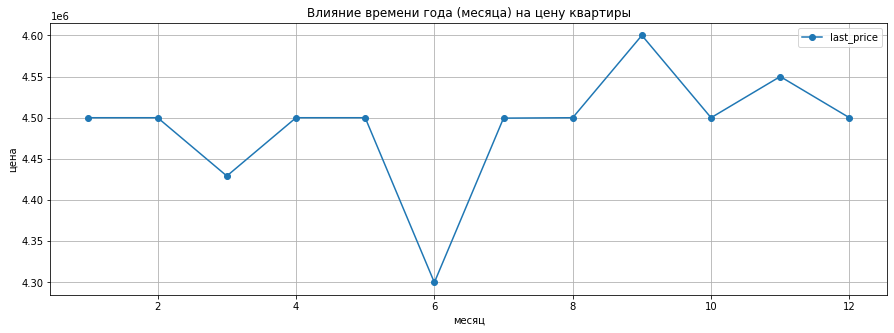

In [97]:
data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').reset_index().plot(x='month_exposition', y='last_price', grid=True, figsize=(15,5), style='o-').set(title='Влияние времени года (месяца) на цену квартиры', xlabel='месяц', ylabel='цена');

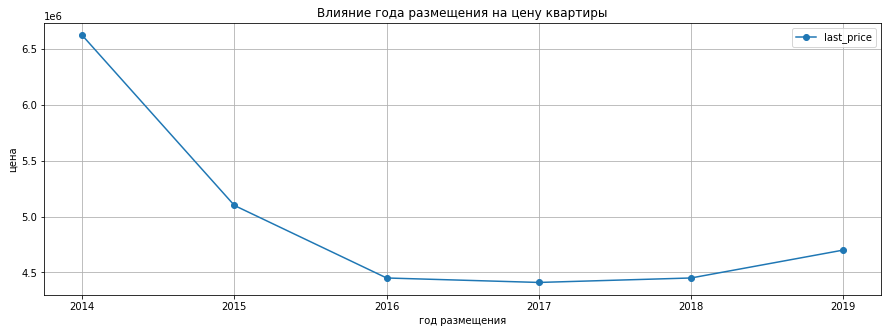

In [98]:
data.pivot_table(index='year_exposition', values='last_price', aggfunc='median').reset_index().plot(x='year_exposition', y='last_price', grid=True, figsize=(15,5), style='o-').set(title='Влияние года размещения на цену квартиры', xlabel='год размещения', ylabel='цена');

***Вывод***<br><br>Общая или жилая площадь и количество комнат влияет на цену квартиры. Квартиры на последнем этаже, стоят гораздо дешевле, чем квартиры на других этажах. Квартиры на первом этаже самые дешевые. Наблюдается просадка цены в пятницу и воскресенье, повышение цены происходит во вторник, в остальные дни цена сохраняется приблизительно на одном уровне. В январе – феврале цена квартир держит единую планку(4.5 млн. руб), далее в марте наблюдается спад цены(4.43 млн.руб), затем в апреле показатели цены возвращаются на январский -февральский период(4.5 млн. руб). В июне цена опускается на самые низкие позиции (4.30 млн.руб).В июле возвращается на планку второй половины зимы (4.5 млн.руб), далее наблюдаются 2 пика роста цены в сентябре(4.6 млн руб) и в ноябре(4.55). С 2014 по 2016 год происходит спад цен на квартиры, с 2018 по 2019 наблюдается умеренный рост цен. 

In [99]:
# cделаем выборку из 10 населённых пунктов с наибольшим числом объявлений и сохраним ее в переменной locality_name_sorted_pivot_table
locality_name_sorted_pivot_table = (data.pivot_table(index = 'locality_name', values = ["price_sq_meter"], aggfunc = ["count","mean"]))

locality_name_sorted_pivot_table.columns = ["count","mean"]

locality_name_sorted_pivot_table.sort_values(by = "count",inplace = True,ascending = False)

locality_name_sorted_pivot_table = locality_name_sorted_pivot_table[:10]

locality_name_sorted_pivot_table

,count,mean
locality_name,,
Санкт-Петербург,13273,108568.140704
поселок Мурино,547,85691.011789
поселок Шушары,407,77872.600324
Всеволожск,338,68512.930184
Колпино,307,74763.339311
Пушкин,303,101956.403818
поселок Парголово,302,89505.043917
деревня Кудрово,299,92473.547576
Гатчина,268,67928.326990


In [100]:
locality_name_sorted_pivot_table.query('mean == mean.min() or mean == mean.max()')

,count,mean
locality_name,,
Санкт-Петербург,13273,108568.140704
Выборг,207,57024.732217


***Вывод***<br><br>Максимальная средняя стоимость жилья  - Санкт-Петербург (108 тыс.за кв.м.),  минимальная - Выборг (57 тыс.за кв.м.)

In [101]:
# выборка недвижимости в Санкт-Петербурге
locality_Saint_P = data.query('locality_name == "Санкт-Петербург"')

In [102]:
# добавим столбец с расстоянием до центра в км
locality_Saint_P['city_centers_nearest_km'] = (locality_Saint_P['city_centers_nearest'].apply(lambda x: x // 1000).astype('int'))

In [103]:
# сводная таблица по удаленности от центра и значением средней стоимости кв.м.
locality_Saint_P_pivot = locality_Saint_P.pivot_table(index='city_centers_nearest_km', values='price_sq_meter', aggfunc='mean').reset_index()

locality_Saint_P_pivot

,city_centers_nearest_km,price_sq_meter
0,0,130285.535071
1,1,130232.304134
2,2,119283.415642
3,3,114941.586113
4,4,130017.394644
5,5,129209.428109
6,6,128589.966624
7,7,126959.281232
8,8,117345.610612
9,9,108099.535976


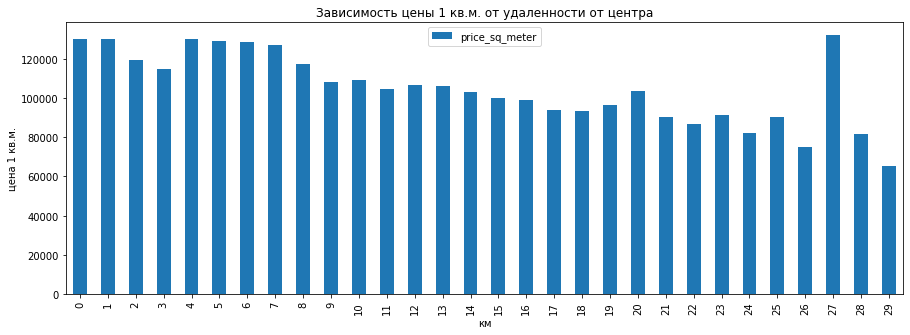

In [104]:
locality_Saint_P_pivot.plot(y = "price_sq_meter",style = 'o',kind = 'bar',figsize = (15,5)).set(title='Зависимость цены 1 кв.м. от удаленности от центра',xlabel='км', ylabel='цена 1 кв.м.');

***Вывод***<br><br>Наблюдается перепад после 8 км, будем считать центром что находится в радиусе 8 км. Средняя цена за 1 кв.м. зависит от удаленности от центра Санкт-Петербурга. В центре ее размер составляет 117 - 130 тыс.руб., и далее уменьшается до 65 тыс.руб.

### Общий вывод

Изучив данные, мы может видеть, что наш датасет имел пропущенные строки. Так же присутствовали столбцы, где нужно было исправить типы данных для дальнейшего использования в анализе. Было обнаружено не большое количество выбросов. Дубликаты после обработки не обнаружены. Добавлены столбцы со значениями цены за 1 кв. м, день объявления, месяц объявления, год объявления, категория этажа, расстояние до центра города в километрах. Проведен исследовательский анализ данных по следующим параметрам: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры, общее количество этажей, расстояние до центра города, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления. По данным параметрам построенные гистограммы. Построены графики зависимости стоимости объекта от таких параметров как: общая площадь, жилая площадь, площадь кухни, количество комнат, этаж, на котором расположена квартира, дата размещения (день недели, месяц, год). Выведено топ 10 населенных пунктов с наибольшим количество объявлений. Определены пункты с самой высокой и самой низкой стоимостью жилья за кв.м. Построен график с зависимостью цены за кв.м от удаленности от центра.<br><br>Среднестатистическая квартира, имеет следующие характеристики: это 2-комнатная квартира в многоэтажном доме(от 6 этажей и выше)расположенном рядом с парком, общей площадью около 56 кв. м, жилой площадью около 32 кв.м, площадью кухни около 10 кв. м, с потолками 2.68 м, проданная за 179 дней по цене 5.5 млн рублей. Удаленность от центра составляет - 14 км, от ближайшего аэропорта -28 км. В течении недели наблюдается устойчивый показатель количества публикаций, на выходных днях происходит спад. Самыми активными периодами продаж является осень и зима, весной и летом происходит понижение спроса.<br><br>Самая дорогая недвижимость стоит в Санкт-Петербурге, что составляет в среднем 108 тыс. руб за кв.м. А самая дешевая в Выборге 57 тыс. руб за кв.м. Причина заключается в том, что Санкт-Петербург является туристическим городом с множеством достопримечательностей. Выборг же находится в удаленности 121 км от Санкт Петербурга.
Судя по графику , центром Санкт-Петербурга является территория радиусом 8 км от нулевого километра. Соответственно средняя цена напрямую будет зависеть от удаленности от центра.


